## Preprosessing

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from scipy.stats import gaussian_kde
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from keras.callbacks import EarlyStopping
import tensorflow as tf
from numpy import array
from google.colab import drive
import seaborn as sns
import numpy
from tensorflow.keras.optimizers import Adam
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# mengunduh file csv dari URL dan menyimpannya sebagai objek response
url = "https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/idx-partners/loan_data_2007_2014.csv"
response = urllib.request.urlopen(url)

# membaca data csv sebagai dataframe menggunakan pandas
df = pd.read_csv(response)
# menampilkan dataframe

# menampilkan dataframe
pd.set_option('display.max_columns', 90)


<ipython-input-2-a7b97bd77551>:6: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(response)


In [ ]:
def null_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)
    total = total[total !=0]
    percent = round(100 * total/ len(df),2)
    return pd.concat([total, percent], axis = 1, keys = ['Total Null' , 'Percent'])

null_percentage(df)


Total Null  Percent
inq_last_12m                     466285   100.00
total_bal_il                     466285   100.00
dti_joint                        466285   100.00
verification_status_joint        466285   100.00
annual_inc_joint                 466285   100.00
open_acc_6m                      466285   100.00
open_il_6m                       466285   100.00
open_il_12m                      466285   100.00
open_il_24m                      466285   100.00
mths_since_rcnt_il               466285   100.00
il_util                          466285   100.00
open_rv_24m                      466285   100.00
total_cu_tl                      466285   100.00
inq_fi                           466285   100.00
max_bal_bc                       466285   100.00
all_util                         466285   100.00
open_rv_12m                      466285   100.00
mths_since_last_record           403647    86.57
mths_since_last_major_derog      367311    78.77
desc                             340302    72.98
mths_since_last_delinq           250351    53.69
next_pymnt_d                     227214    48.73
tot_cur_bal                       70276    15.07
tot_coll_amt                      70276    15.07
total_rev_hi_lim                  70276    15.07
emp_title                         27588     5.92
emp_length                        21008     4.51
last_pymnt_d                        376     0.08
revol_util                          340     0.07
collections_12_mths_ex_med          145     0.03
last_credit_pull_d                   42     0.01
inq_last_6mths                       29     0.01
earliest_cr_line                     29     0.01
delinq_2yrs                          29     0.01
open_acc                             29     0.01
pub_rec                              29     0.01
acc_now_delinq                       29     0.01
total_acc                            29     0.01
title                                20     0.00
annual_inc                            4     0.00

In [ ]:
pd.set_option('display.max_columns', 90)
data = df[['id', 'loan_amnt', 'int_rate',
         'term','installment', 'grade', 'sub_grade', 'emp_title', 
         'emp_length','home_ownership','annual_inc','purpose',
         'issue_d','loan_status','dti', 'delinq_2yrs','earliest_cr_line', 'open_acc','revol_util', 'collections_12_mths_ex_med',
        'total_acc','total_pymnt','revol_bal', 'tot_coll_amt','inq_last_6mths', 'pub_rec','acc_now_delinq',
         'last_pymnt_d','last_credit_pull_d','tot_cur_bal','total_rev_hi_lim']]
         
drop_col = ['revol_util', 'issue_d', 'delinq_2yrs', 'delinq_2yrs','earliest_cr_line','open_acc','collections_12_mths_ex_med','total_acc', 'total_pymnt',
            'revol_bal','tot_coll_amt','inq_last_6mths','pub_rec','acc_now_delinq','last_pymnt_d','last_credit_pull_d','tot_cur_bal','total_rev_hi_lim']

for col in drop_col :
    if col in data.columns:
        data = data.drop(col, axis = 1)

data

id  loan_amnt  int_rate        term  installment grade sub_grade  \
0       1077501       5000     10.65   36 months       162.87     B        B2   
1       1077430       2500     15.27   60 months        59.83     C        C4   
2       1077175       2400     15.96   36 months        84.33     C        C5   
3       1076863      10000     13.49   36 months       339.31     C        C1   
4       1075358       3000     12.69   60 months        67.79     B        B5   
...         ...        ...       ...         ...          ...   ...       ...   
466280  8598660      18400     14.47   60 months       432.64     C        C2   
466281  9684700      22000     19.97   60 months       582.50     D        D5   
466282  9584776      20700     16.99   60 months       514.34     D        D1   
466283  9604874       2000      7.90   36 months        62.59     A        A4   
466284  9199665      10000     19.20   36 months       367.58     D        D3   

                                    emp_title emp_length home_ownership  \
0                                         NaN  10+ years           RENT   
1                                       Ryder   < 1 year           RENT   
2                                         NaN  10+ years           RENT   
3                         AIR RESOURCES BOARD  10+ years           RENT   
4                    University Medical Group     1 year           RENT   
...                                       ...        ...            ...   
466280                     Financial Advisor     4 years       MORTGAGE   
466281  Chief of Interpretation (Park Ranger)  10+ years       MORTGAGE   
466282                                 patrol    7 years       MORTGAGE   
466283                   Server Engineer Lead    3 years            OWN   
466284                                    NaN  10+ years       MORTGAGE   

        annual_inc             purpose  loan_status    dti  
0          24000.0         credit_card   Fully Paid  27.65  
1          30000.0                 car  Charged Off   1.00  
2          12252.0      small_business   Fully Paid   8.72  
3          49200.0               other   Fully Paid  20.00  
4          80000.0               other      Current  17.94  
...            ...                 ...          ...    ...  
466280    110000.0  debt_consolidation      Current  19.85  
466281     78000.0  debt_consolidation  Charged Off  18.45  
466282     46000.0  debt_consolidation      Current  25.65  
466283     83000.0         credit_card   Fully Paid   5.39  
466284     46000.0               other      Current  22.78  

[466285 rows x 14 columns]

In [ ]:
data_loan = data.groupby('loan_status')['loan_status'].count().to_frame()
data_loan = data_loan.rename(columns = {'loan_status' : 'count'})
data_loan = data_loan.sort_values('count', ascending = False)
data_loan


count
loan_status                                               
Current                                             224226
Fully Paid                                          184739
Charged Off                                          42475
Late (31-120 days)                                    6900
In Grace Period                                       3146
Does not meet the credit policy. Status:Fully Paid    1988
Late (16-30 days)                                     1218
Default                                                832
Does not meet the credit policy. Status:Charged...     761

In [ ]:

plot_loan = px.bar(data_loan, x = data_loan.index, y = 'count')
plot_loan.update_layout(title = 'Loan Status',width = 1500, height = 600 )
plot_loan.update_xaxes(tickangle = 90)
plot_loan.show()

In [ ]:
data_loan = data_loan.reset_index()
data_loan = data_loan.sort_values('count', ascending = False)
data_loan_name = data_loan.iloc[0:3]["loan_status"]
data = data[data['loan_status'].isin(data_loan_name)]
data.drop(data[data['loan_status'] == 'Current'].index, inplace = True)


<ipython-input-6-86062fd888ba>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data['loan_status'] == 'Current'].index, inplace = True)


In [ ]:
data = data[data['loan_status'].isin(data_loan_name)]
data.drop(data[data['loan_status'] == 'Current'].index, inplace = True)


<function matplotlib.pyplot.show(close=None, block=None)>

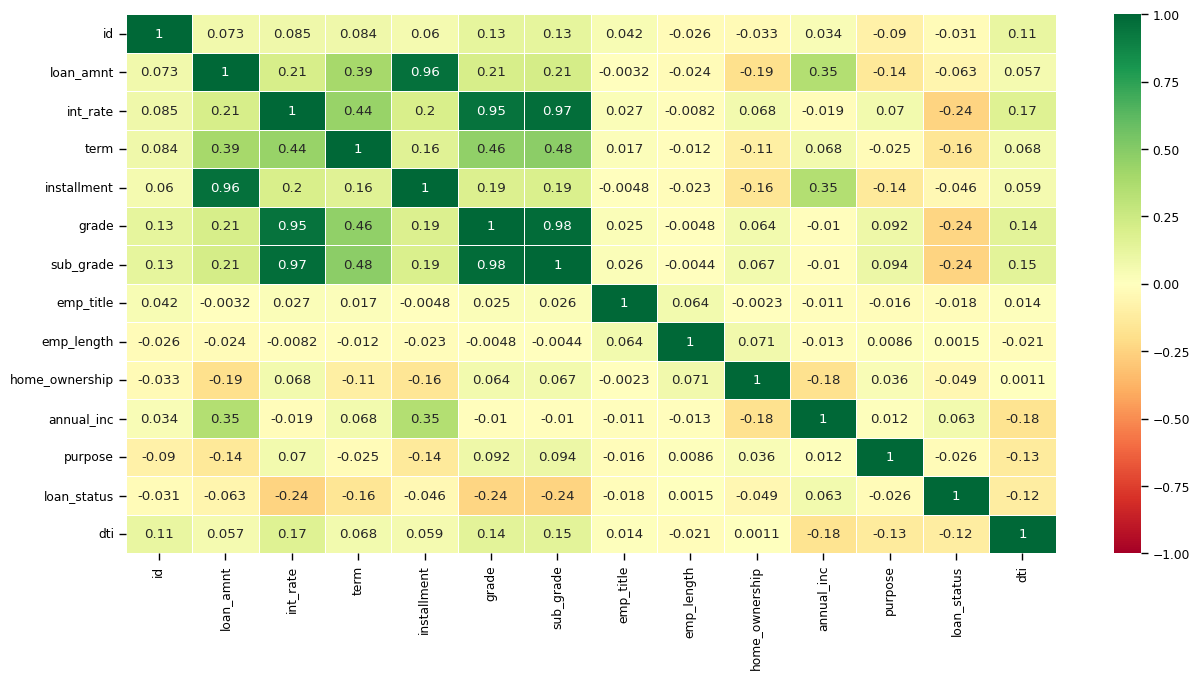

In [ ]:
plt.figure(figsize= (15,7))
sns.set_context('paper', font_scale = 1)

sns.heatmap(data.assign(home_ownership = data.home_ownership.astype('category').cat.codes,
                        purpose = data.purpose.astype('category').cat.codes,
                        term = data.term.astype('category').cat.codes,
                        grade = data.grade.astype('category').cat.codes,
                        sub_grade = data.sub_grade.astype('category').cat.codes,
                        emp_title = data.emp_title.astype('category').cat.codes,
                        emp_length = data.emp_length.astype('category').cat.codes,
                        loan_status = data.loan_status.astype('category').cat.codes).corr(),
                        annot = True, cmap = 'RdYlGn', vmin = -1, vmax = 1, linewidths = 0.5)

plt.show

In [ ]:
data = data.drop(['id', 'grade', 'sub_grade', 'installment'], axis = 1)
data = data.dropna()

In [ ]:
data

loan_amnt        term emp_length home_ownership  annual_inc  \
0            5000   36 months  10+ years           RENT     24000.0   
1            2500   60 months   < 1 year           RENT     30000.0   
2            2400   36 months  10+ years           RENT     12252.0   
3           10000   36 months  10+ years           RENT     49200.0   
5            5000   36 months    3 years           RENT     36000.0   
...           ...         ...        ...            ...         ...   
466276       8525   60 months    5 years       MORTGAGE     37536.0   
466277      18000   36 months    3 years           RENT     90000.0   
466278      10000   36 months  10+ years           RENT     42000.0   
466281      22000   60 months  10+ years       MORTGAGE     78000.0   
466283       2000   36 months    3 years            OWN     83000.0   

                   purpose  loan_status  
0              credit_card   Fully Paid  
1                      car  Charged Off  
2           small_business   Fully Paid  
3                    other   Fully Paid  
5                  wedding   Fully Paid  
...                    ...          ...  
466276             medical  Charged Off  
466277  debt_consolidation  Charged Off  
466278            vacation   Fully Paid  
466281  debt_consolidation  Charged Off  
466283         credit_card   Fully Paid  

[218360 rows x 7 columns]

In [ ]:


bins = [-np.inf, 1, 5, 9, np.inf]
labels = ['<1 year', '1-5 years', '6-9 years', '10+ years']

data['emp_length']=  pd.cut(pd.to_numeric(data['emp_length'].str.extract('(\d+)')[0]), bins = bins, labels = labels)


In [ ]:
def plot_his_dis(data):
    kde = gaussian_kde(data)
    x = np.linspace(data.min(), data.max())
    y = kde(x)

    plot_his = px.histogram(x = data, nbins = 50, opacity = 0.5)

    plot_his.add_trace(go.Scatter(x = x,
                                  y = y,
                                  name = 'Density',
                                  yaxis = 'y2',
                                  line = dict(color = 'red', width = 3)))
    plot_his.update_layout(bargroupgap = 0.2)
    plot_his.update_layout(yaxis2 = dict(title = 'Density', 
                                         title_font = dict(family = 'arial'),
                                         overlaying = 'y', side = 'right'))
    return plot_his

In [ ]:
plot_his_dis(data['loan_amnt'])

In [ ]:
plot_his_dis(data['dti'])

In [ ]:
plot_his_dis(data['int_rate'])

In [ ]:

def boxplot(data):
    sns.set(style = 'whitegrid')
    plt.figure(figsize = (10,6))
    sns.boxplot(x=data)
    plt.xlabel('Annual Income')
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

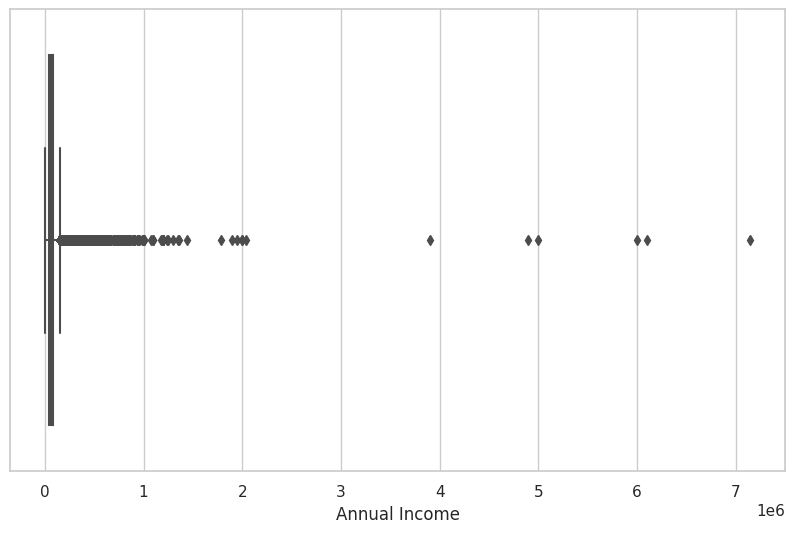

In [ ]:
boxplot(data['annual_inc'])

In [ ]:
data_term = data.groupby('term')['term'].count().sort_values(ascending = False)
data_emp_length = data.groupby('emp_length')['emp_length'].count().sort_values(ascending= False)
data_home_ownership = data.groupby('home_ownership')['home_ownership'].count().sort_values(ascending = False)
data_purpose = data.groupby('purpose')['purpose'].count().sort_values(ascending = False)

In [ ]:
plot_home_ownership = px.bar(data_home_ownership, x = data_home_ownership.index, y = data_home_ownership, color =data_home_ownership.index )
plot_home_ownership.update_xaxes(title ='Home Owner')
plot_home_ownership.update_yaxes(title = 'Jumlah')
plot_home_ownership.show()

In [ ]:
data_name_home_owner = ['MORTGAGE', 'RENT', 'OWN']
data = data[data['home_ownership'].isin(data_name_home_owner)]
data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

In [ ]:
plot_purpose = px.bar(data_purpose, x = data_purpose.index, y = data_purpose, color = data_purpose.index)
plot_purpose.update_xaxes(title = 'Purpose')
plot_purpose.update_yaxes(title = 'Jumlah')
plot_purpose.show()

In [ ]:
plot_emp_length = px.bar(data_emp_length, x =data_emp_length.index, y = data_emp_length, color = data_emp_length.index)
plot_emp_length.update_xaxes(title = 'Employee length')
plot_emp_length.update_yaxes(title = 'Jumlah')
plot_emp_length.show()

In [ ]:
plot_term = px.bar(data_term, x = data_term.index, y = data_term, color = data_term.index)
plot_term.update_xaxes(title = 'Term')
plot_term.update_yaxes(title = 'Jumlah')
plot_term.show()



In [ ]:
data_dist_loan = data.groupby(['annual_inc', 'term', 'loan_status'])['loan_amnt'].mean().reset_index()
data_dist_loan 

annual_inc        term  loan_status  loan_amnt
0          4000.0   36 months   Fully Paid     2000.0
1          4080.0   36 months  Charged Off     1400.0
2          4200.0   36 months   Fully Paid     2750.0
3          4800.0   36 months  Charged Off     1200.0
4          4800.0   36 months   Fully Paid     2100.0
...           ...         ...          ...        ...
20190   4900000.0   36 months   Fully Paid    15600.0
20191   5000000.0   36 months   Fully Paid    35000.0
20192   6000000.0   36 months   Fully Paid     5000.0
20193   6100000.0   36 months   Fully Paid    30000.0
20194   7141778.0   36 months   Fully Paid    14825.0

[20195 rows x 4 columns]

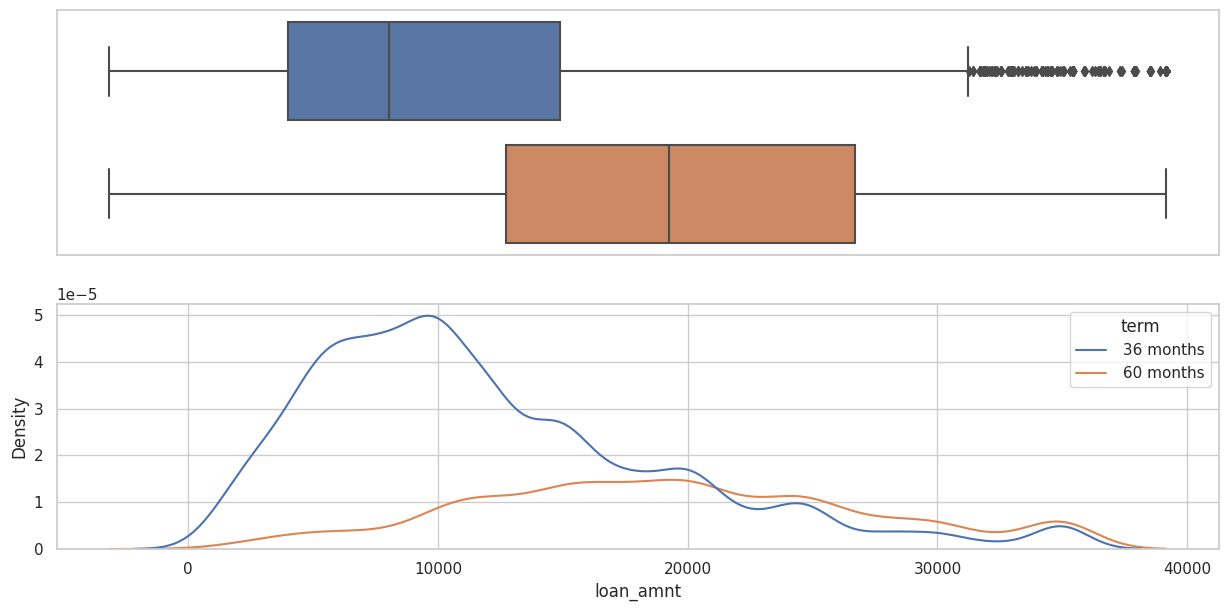

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (15,7))

sns.boxplot(data = data_dist_loan, x = 'loan_amnt', y = 'term', ax = axes[0])
sns.kdeplot(data = data_dist_loan, x = 'loan_amnt',hue = 'term',ax = axes[1])


axes[0].set(xticks = [], yticks = [])
axes[0].set_xlabel(None)
axes[0].set_ylabel(None)




plt.show()


In [ ]:
data_dist_loan

annual_inc        term  loan_status  loan_amnt
0          4000.0   36 months   Fully Paid     2000.0
1          4080.0   36 months  Charged Off     1400.0
2          4200.0   36 months   Fully Paid     2750.0
3          4800.0   36 months  Charged Off     1200.0
4          4800.0   36 months   Fully Paid     2100.0
...           ...         ...          ...        ...
20190   4900000.0   36 months   Fully Paid    15600.0
20191   5000000.0   36 months   Fully Paid    35000.0
20192   6000000.0   36 months   Fully Paid     5000.0
20193   6100000.0   36 months   Fully Paid    30000.0
20194   7141778.0   36 months   Fully Paid    14825.0

[20195 rows x 4 columns]

In [ ]:
data_dist_loan['loan_status_term'] = data_dist_loan['term'] + " " + data_dist_loan['loan_status']
data_dist_loan

annual_inc        term  loan_status  loan_amnt        loan_status_term
0          4000.0   36 months   Fully Paid     2000.0    36 months Fully Paid
1          4080.0   36 months  Charged Off     1400.0   36 months Charged Off
2          4200.0   36 months   Fully Paid     2750.0    36 months Fully Paid
3          4800.0   36 months  Charged Off     1200.0   36 months Charged Off
4          4800.0   36 months   Fully Paid     2100.0    36 months Fully Paid
...           ...         ...          ...        ...                     ...
20190   4900000.0   36 months   Fully Paid    15600.0    36 months Fully Paid
20191   5000000.0   36 months   Fully Paid    35000.0    36 months Fully Paid
20192   6000000.0   36 months   Fully Paid     5000.0    36 months Fully Paid
20193   6100000.0   36 months   Fully Paid    30000.0    36 months Fully Paid
20194   7141778.0   36 months   Fully Paid    14825.0    36 months Fully Paid

[20195 rows x 5 columns]

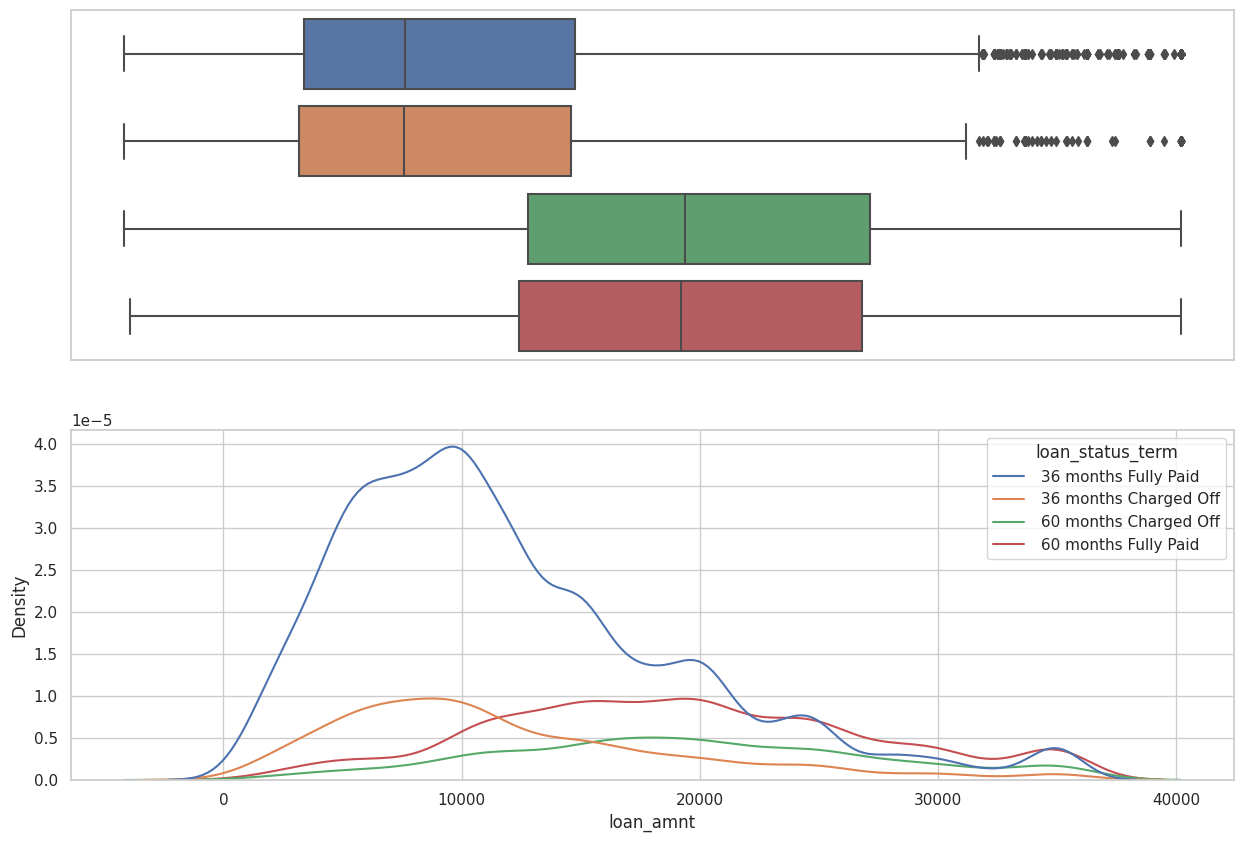

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (15,10))

sns.boxplot(data = data_dist_loan, x = 'loan_amnt', y = 'loan_status_term', ax = axes[0])
sns.kdeplot(data = data_dist_loan, x = 'loan_amnt',hue = 'loan_status_term',ax = axes[1])


axes[0].set(xticks = [], yticks = [])
axes[0].set_xlabel(None)
axes[0].set_ylabel(None)


plt.show()

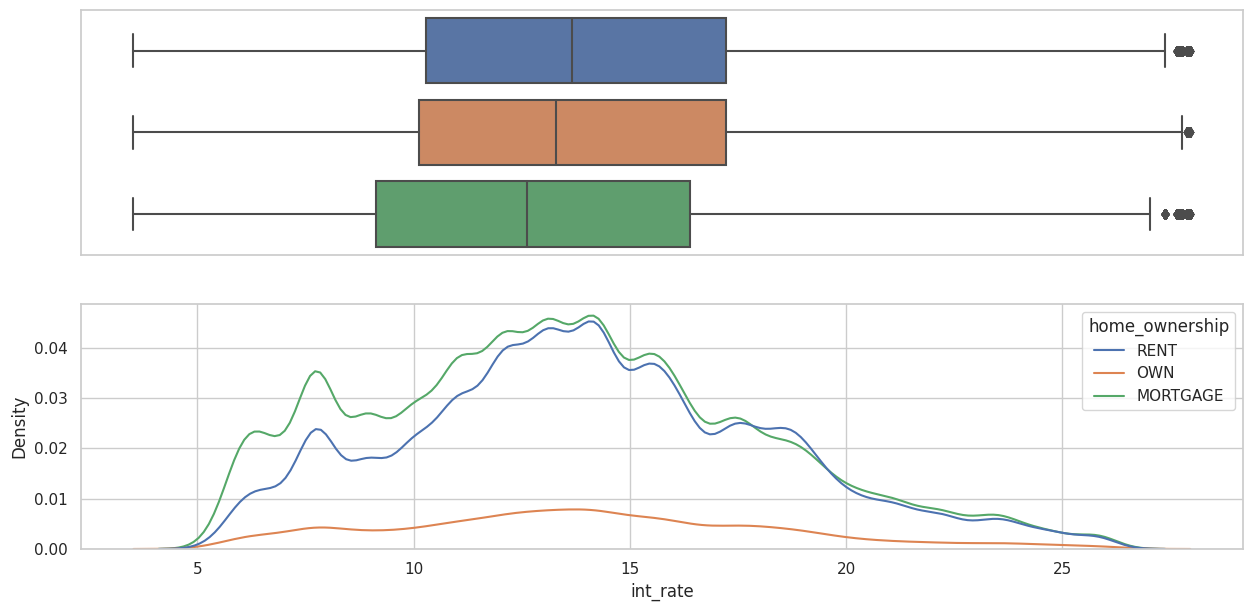

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (15,7))

sns.boxplot(data = data, x = 'int_rate', y = 'home_ownership', ax = axes[0])
sns.kdeplot(data = data, x = 'int_rate',hue = 'home_ownership',ax = axes[1])


axes[0].set(xticks = [], yticks = [])
axes[0].set_xlabel(None)
axes[0].set_ylabel(None)




plt.show()


In [ ]:
data = data.drop(['int_rate', 'dti', 'emp_title'], axis = 1)
data_preprocessing = data

###Encoding and normalization

In [ ]:

# encode kategorikal features
categorical_features = ['term',  'emp_length', 'home_ownership', 'purpose', 'loan_status']

for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])


numerical_features = ['loan_amnt', 'annual_inc']


for col in numerical_features:
  scaler = MinMaxScaler()
  data[col] = scaler.fit_transform(data[[col]])


In [ ]:
# split dataset into train and test set
X = data.drop('loan_status', axis=1)
y = data['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Imbelance Data

In [ ]:
data_loan_status = data.groupby('loan_status').size().reset_index(name='counts')
data_loan_status


loan_status  counts
0            0   39177
1            1  175046

In [ ]:
plot_imbalance = px.bar(data_loan_status, x = 'loan_status', y = 'counts')
plot_imbalance.show()

In [ ]:

# Lakukan SMOTE pada subset training
# Lakukan Random Oversampling pada subset training
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)



## Random Forest 

In [ ]:
# create random forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
scores = cross_val_score(rf_clf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())

Cross-validation scores: [0.94622197 0.95125609 0.95413073 0.95611263 0.95513061]
Mean score: 0.952570406477875


In [ ]:
y_pred = rf_clf.predict(X_test)

# generate classification report with confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

 Charged Off       0.40      0.17      0.24      7817
  Fully Paid       0.84      0.94      0.89     35028

    accuracy                           0.80     42845
   macro avg       0.62      0.56      0.56     42845
weighted avg       0.76      0.80      0.77     42845

Confusion Matrix:
 [[ 1327  6490]
 [ 2032 32996]]


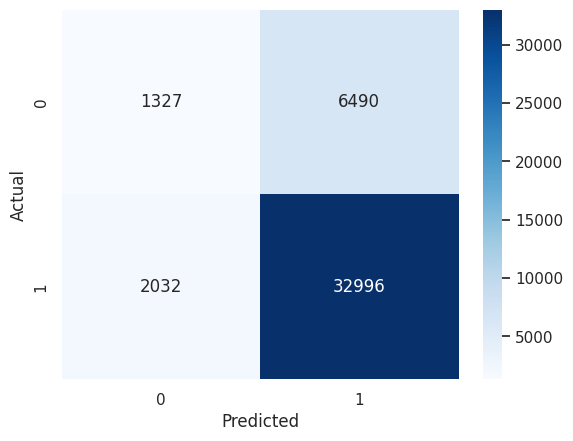

In [ ]:
# menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# menampilkan confusion matrix dalam bentuk heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
joblib.dump(rf_clf, '/media/model.pkl')

['/media/model.pkl']

## SVM


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Train SVM Classifier
svm = SVC(random_state=42)
svm.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred = svm.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)

# generate classification report with confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# save the trained model for deployment
joblib.dump(rf_clf, '/media/model_svm.pkl')



In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [ ]:
# save the trained model for deployment
joblib.dump(rf_clf, '/media/model_svm.pkl')

In [ ]:
# melakukan prediksi pada data testing
y_pred = rf_clf.predict(X_test)

# menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# menampilkan confusion matrix dalam bentuk heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}

svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train_resampled, y_train_resampled)

# mencetak parameter terbaik
print(clf.best_params_)


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Akurasi model: {:.2f}%".format(accuracy * 100))


In [ ]:
import joblib

joblib.dump(clf, 'credit_risk_model_svm.pkl')


## Decision Tree


In [ ]:
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred = dt.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Classifier accuracy:", accuracy)

# generate classification report with confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Decision Tree Classifier accuracy: 0.7225046641791045
Classification Report:
               precision    recall  f1-score   support

 Charged Off       0.25      0.26      0.25      7838
  Fully Paid       0.83      0.83      0.83     35042

    accuracy                           0.72     42880
   macro avg       0.54      0.54      0.54     42880
weighted avg       0.73      0.72      0.72     42880

Confusion Matrix:
 [[ 2017  5821]
 [ 6078 28964]]


## LSTM


In [ ]:
X = data.drop('loan_status', axis = 1)
y = data['loan_status']

In [ ]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [ ]:
train_size = int(len(X_resampled) *0.8)
test_size = int(len(X_resampled) - train_size)
print(train_size)
print(test_size)

280302
70076


In [ ]:
y_test.shape

(42880,)

In [ ]:
X_train_resampled =  X_resampled.iloc[:train_size,:]
X_test_resampled = X_resampled.iloc[train_size:,:]
y_train_resampled= y_resampled.iloc[:train_size]
y_test_resampled = y_resampled.iloc[train_size:]

print(f'X train : {X_train}, dengan Shape {X_train.shape}')
print(f'y train : {y_train}, dengan Shape {y_train.shape}')
print(f'X test : {X_test}, dengan Shape {X_test.shape}')
print(f'y test : {y_test}, dengan Shape {X_test.shape}')

X train : [[[5.79710145e-02 1.00000000e+00 1.00000000e+01 5.00000000e+00
   3.64259017e-03 0.00000000e+00]
  [2.75362319e-01 0.00000000e+00 1.00000000e+00 5.00000000e+00
   6.33250292e-03 9.00000000e+00]
  [1.30434783e-01 0.00000000e+00 3.00000000e+00 5.00000000e+00
   4.48318791e-03 1.30000000e+01]
  ...
  [7.62318841e-01 1.00000000e+00 3.00000000e+00 1.00000000e+00
   1.62515562e-02 2.00000000e+00]
  [2.17391304e-01 0.00000000e+00 5.00000000e+00 1.00000000e+00
   4.34308828e-03 2.00000000e+00]
  [2.75362319e-01 0.00000000e+00 0.00000000e+00 5.00000000e+00
   9.94707316e-03 1.00000000e+00]]

 [[2.75362319e-01 0.00000000e+00 1.00000000e+00 5.00000000e+00
   6.33250292e-03 9.00000000e+00]
  [1.30434783e-01 0.00000000e+00 3.00000000e+00 5.00000000e+00
   4.48318791e-03 1.30000000e+01]
  [7.24637681e-02 0.00000000e+00 9.00000000e+00 5.00000000e+00
   6.16438337e-03 0.00000000e+00]
  ...
  [2.17391304e-01 0.00000000e+00 5.00000000e+00 1.00000000e+00
   4.34308828e-03 2.00000000e+00]
  [2.7

In [ ]:
def create_data(dataset, timestep):

    data = []
    for i in range(len(dataset) - timestep):
        data.append(dataset[i:i+timestep])
    return np.array(data)

In [ ]:
timestep = 365


X_train_resampled = create_data(X_train_resampled, timestep)
y_resampled = create_data(y_resampled, timestep)
X_test_resampled = create_data(X_test_resampled, timestep)
y_test_resampled = create_data(y_test_resampled, timestep)


In [ ]:
print(f"X_train Shape : {X_train.shape}")
print(f'y_train Shape : {y_train.shape}')
print(f'X_test Shape : {X_test.shape}')
print(f'y_test Shape : {y_test.shape}')

X_train Shape : (171419, 100, 6)
y_train Shape : (171419, 100)
X_test Shape : (42780, 100, 6)
y_test Shape : (42780, 100)


In [ ]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])
y_test = y_test.reshape(y_test.shape[0], y_test.shape[1])

In [ ]:
#from tensorflow.keras.callbacks import EarlyStopping
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(100,6)))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128,return_sequences =True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dense(1))



#model.compile(loss='mean_absolute_error',optimizer= Adam(lr=0.000001))
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
#early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, epochs=10, batch_size=320, validation_data=(X_test, y_test), shuffle=False)

Epoch 1/10
536/536 [==============================] - 43s 67ms/step - loss: 0.5014 - accuracy: 0.8124 - val_loss: 0.5106 - val_accuracy: 0.7956
Epoch 2/10
536/536 [==============================] - 37s 69ms/step - loss: 0.4683 - accuracy: 0.8225 - val_loss: 0.5094 - val_accuracy: 0.7956
Epoch 3/10
536/536 [==============================] - 34s 64ms/step - loss: 0.4667 - accuracy: 0.8225 - val_loss: 0.5088 - val_accuracy: 0.7956
Epoch 4/10
536/536 [==============================] - 37s 69ms/step - loss: 0.4664 - accuracy: 0.8225 - val_loss: 0.5084 - val_accuracy: 0.7956
Epoch 5/10
536/536 [==============================] - 34s 64ms/step - loss: 0.4663 - accuracy: 0.8225 - val_loss: 0.5080 - val_accuracy: 0.7956
Epoch 6/10
536/536 [==============================] - 36s 68ms/step - loss: 0.4662 - accuracy: 0.8225 - val_loss: 0.5079 - val_accuracy: 0.7956
Epoch 7/10
536/536 [==============================] - 37s 68ms/step - loss: 0.4661 - accuracy: 0.8225 - val_loss: 0.5077 - val_accuracy:

In [ ]:
model.save('lstm_model.h5')

## Decision Tree Hyperparams

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

# Load data


# Split data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2)

# Definisikan hyperparameter grid untuk tuning
param_grid = {'max_depth': [20, 30, 40, None], 
              'max_features': ['sqrt', 'log2','auto', None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4,6],
              'splitter' : ['best', 'random'],
              'criterion': ['gini', 'entropy', 'log_loss']}

# Buat model Decision Tree
dt = DecisionTreeClassifier()

# Buat objek GridSearchCV untuk tuning hyperparameter
grid = GridSearchCV(dt, param_grid=param_grid, cv=5, n_jobs=-1)

# Train model dengan GridSearchCV
grid.fit(X_train, y_train)

# Cetak hasil tuning
print("Best Parameters:\n", grid.best_params_)
print("\nBest Estimator:\n", grid.best_estimator_)

# Prediksi hasil test set
y_pred = grid.predict(X_test)

# Evaluasi performa model
print("\nClassification Report:\n", classification_report(y_test, y_pred))


##ANN

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# Split dataset menjadi training set dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


model = Sequential()
model.add(Dense(1536, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.3))
model.add(Dense(1, activation='sigmoid'))



In [ ]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=100, batch_size=62, validation_data=(X_test, y_test))

Epoch 1/100
4518/4518 [==============================] - 58s 8ms/step - loss: 0.6932 - accuracy: 0.4995 - val_loss: 0.6932 - val_accuracy: 0.4973
Epoch 2/100
4518/4518 [==============================] - 41s 9ms/step - loss: 0.6932 - accuracy: 0.4989 - val_loss: 0.6931 - val_accuracy: 0.5027
Epoch 3/100
4518/4518 [==============================] - 35s 8ms/step - loss: 0.6932 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.4973
Epoch 4/100
4518/4518 [==============================] - 44s 10ms/step - loss: 0.6932 - accuracy: 0.4986 - val_loss: 0.6931 - val_accuracy: 0.5027
Epoch 5/100
4518/4518 [==============================] - 36s 8ms/step - loss: 0.6932 - accuracy: 0.4997 - val_loss: 0.6931 - val_accuracy: 0.4973
Epoch 6/100
4518/4518 [==============================] - 36s 8ms/step - loss: 0.6932 - accuracy: 0.4994 - val_loss: 0.6931 - val_accuracy: 0.5027
Epoch 7/100
4518/4518 [==============================] - 36s 8ms/step - loss: 0.6932 - accuracy: 0.5007 - val_loss: 0.6932 

In [ ]:
# Define the function to create the model
def create_model(neurons=1, dropout_rate=0.0, optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model



# create the Keras model
model = KerasClassifier(build_fn=create_model)

# define the grid search parameters
param_grid = {'neurons': [8, 16, 32],
              'dropout_rate': [0.1, 0.2, 0.3],
              'optimizer': ['adam', 'rmsprop']}

# create the grid search object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')

# fit the grid search object to the data
grid_result = grid.fit(X_train, y_train)

# print the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


<ipython-input-54-80681edd5f9e>:21: DeprecationWarning:

KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



5356/5356 [==============================] - 18s 3ms/step - loss: 0.4812 - accuracy: 0.8152
Best: 0.817013 using {'dropout_rate': 0.1, 'neurons': 8, 'optimizer': 'adam'}


In [ ]:
 model.save("my_model")

## KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# inisialisasi model KNN
knn = KNeighborsClassifier()

# definisikan hyperparameter yang akan diuji
params = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

# inisialisasi GridSearchCV untuk melakukan tuning hyperparameter
grid_search = GridSearchCV(knn, params, cv=5, n_jobs=-1)

# pelatihan model KNN dengan GridSearchCV
grid_search.fit(X_train_resampled, y_train_resampled)

# evaluasi model KNN dengan hyperparameter tuning pada data uji
accuracy = grid_search.score(X_test, y_test)

# print hyperparameter terbaik dan akurasi model
print("Hyperparameter terbaik:", grid_search.best_params_)
print("Akurasi model KNN: {:.2f}%".format(accuracy * 100))

Hyperparameter terbaik: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Akurasi model KNN: 83.21%


In [ ]:
from joblib import dump
dump(grid_search, 'knn_model.joblib')

['knn_model.joblib']

In [ ]:
grid_search.predict()

In [ ]:
# Predict on test data
y_pred = grid_search.predict(X_test)

# Evaluate accuracy


# generate classification report with confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.75      0.82     35200
           1       0.78      0.92      0.84     34819

    accuracy                           0.83     70019
   macro avg       0.84      0.83      0.83     70019
weighted avg       0.84      0.83      0.83     70019

Confusion Matrix:
 [[26396  8804]
 [ 2950 31869]]
